## 課題提出時（2018/12/10）の所感
課題の目的であるノウハウは得られたと思います。  

・アノテーションファイルを前処理するところをテキストエディタで対応しようとしてましたが、Pythonで実現できることを学びました。  
・ソースコードが巨大で、kerasの仕組みやPythonの文法で分からない箇所が多数ありましたが、指定するパスやファイル名を修正するだけで案外簡単に動かすことができることを学びました。  
・AWSの構築にも時間が掛かりました。ただ、毎回クイックインスタンスを作成しているうちに操作方法は身に付いてきていると思います。  

## 1.この課題の目的
・公開されている実装を動かす際のノウハウを得る  
【目的としないこと】  
・実装を探す  
・論文の実装を自力で行う  

## 2.進め方
・実装を動かす（1日目〜2日目）  
・コードリーディング（2日目）  

## 3.GitHub上に公開されている実装を任意のデータセットで動かす
前回のsprint16で使用したシンプソンズのデータセットを他の手法でも学習・推定を行う。YOLOv3[1]のKeras実装を使う。  
qqwweee/keras-yolo3: A Keras implementation of YOLOv3 (Tensorflow backend)
[1]Jeseph Redmon, Ali Farhadi. YOLOv3: An Incremental Improvement  
https://pjreddie.com/media/files/papers/YOLOv3.pdf  

（再掲）  
sprint16で使用した実装は以下である。  
lasershow/SimpsonRecognition: Detect and recognize The Simpsons characters using Keras and Faster R-CNN

### デモを動かす
実行  
学習済みの重みを使い推定を行う方法がREADME.mdのQuick Startに記載されている。
まずはこの通りにして各自何かしらの画像や動画に対して検出を行ってみる。シンプソンズの画像も試してみる。その結果を課題の一部として提出すること。

### 【回答】

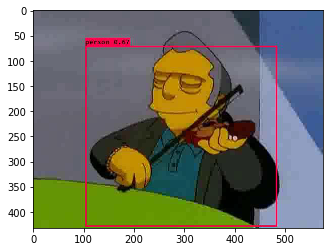

In [12]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

im = Image.open("/Users/tsuneo/keras-yolo3/test.jpg")

im_list = np.asarray(im)
plt.imshow(im_list)
plt.show()

### 学習のためのファイルを作成する
前処理（アノテーションファイルの作成）  
コーディング  
README.mdのTrainingを読み、シンプソンズデータセットを学習するために必要なファイルを作成する。  
アノテーションファイルの形式がsprint16で使用した実装とは異なっているので、変換する必要がある。

### 【回答】

In [3]:
conv = {
"abraham_grampa_simpson":0,
"apu_nahasapeemapetilon":1,
"bart_simpson":2,
"charles_montgomery_burns":3,
"chief_wiggum":4,
"comic_book_guy":5,
"edna_krabappel":6,
"homer_simpson":7,
"kent_brockman":8,
"krusty_the_clown":9,
"lisa_simpson":10,
"marge_simpson":11,
"milhouse_van_houten":12,
"moe_szyslak":13,
"ned_flanders":14,
"nelson_muntz":15,
"principal_skinner":16,
"sideshow_bob":17}

import numpy as np
import pandas as pd
a = pd.read_csv("/Users/tsuneo/keras-yolo3/annotation_thistime.txt")
a.name = a.name.replace(conv)
a.head()

,Path,a,b,c,d,name
0,simpsons_dataset/abraham_grampa_simpson/pic_00...,57,72,52,72,0
1,simpsons_dataset/abraham_grampa_simpson/pic_00...,80,31,337,354,0
2,simpsons_dataset/abraham_grampa_simpson/pic_00...,128,48,285,407,0
3,simpsons_dataset/abraham_grampa_simpson/pic_00...,72,126,158,275,0
4,simpsons_dataset/abraham_grampa_simpson/pic_00...,123,61,294,416,0


In [4]:
b = a.values.tolist()
bb=[]
for i in b:
    maped_list = map(str, i)
    mojiretu = ",".join(maped_list)
    mojiretu = mojiretu.replace("jpg," ,"jpg ")
    bb.append(mojiretu)

In [5]:
f = open('annotation_new2.txt', 'w')
for x in bb:
    f.write(str(x) + "\n")
f.close()

### 学習
実行  
作成したファイルを使用して学習する。デモで使用した画像を再び入力して、違いを見てみる。その結果を課題の一部として提出すること。

### 【回答】
aws（p2.xlarge）で学習したときの情報を貼り付けます。6時間制限もあるためepochは8へ減らしました。ただlossは下がっていることが確認できます。

In [ ]:
Freeze the first 249 layers of total 252 layers.
Train on 7101 samples, val on 788 samples, with batch size 32.
Epoch 1/4
221/221 [==============================] - 460s 2s/step - loss: 698.1552 - val_loss: 74.4257
Epoch 2/4
221/221 [==============================] - 416s 2s/step - loss: 55.7850 - val_loss: 41.5353
Epoch 3/4
221/221 [==============================] - 416s 2s/step - loss: 36.9899 - val_loss: 31.9078
Epoch 4/4
221/221 [==============================] - 412s 2s/step - loss: 30.2392 - val_loss: 27.5529
Unfreeze all of the layers.
Train on 7101 samples, val on 788 samples, with batch size 5.
Epoch 1/4
1420/1420 [==============================] - 1708s 1s/step - loss: 17.8915 - val_loss: 16.5805
Epoch 2/4
1420/1420 [==============================] - 1692s 1s/step - loss: 16.0065 - val_loss: 15.8948
Epoch 3/4
1420/1420 [==============================] - 1691s 1s/step - loss: 15.1536 - val_loss: 14.7925
Epoch 4/4
1420/1420 [==============================] - 1691s 1s/step - loss: 14.3999 - val_loss: 14.1942

/Users/tsuneo/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/PIL/Image.py:2575: DecompressionBombWarning: Image size (97571967 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


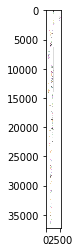

In [12]:
# 学習時のtensorboardを貼り付けて見ます。見えないですが。。
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

im = Image.open("AIF_sprint17_temp/graph?run=.png")

im_list = np.asarray(im)
plt.imshow(im_list)
plt.show()

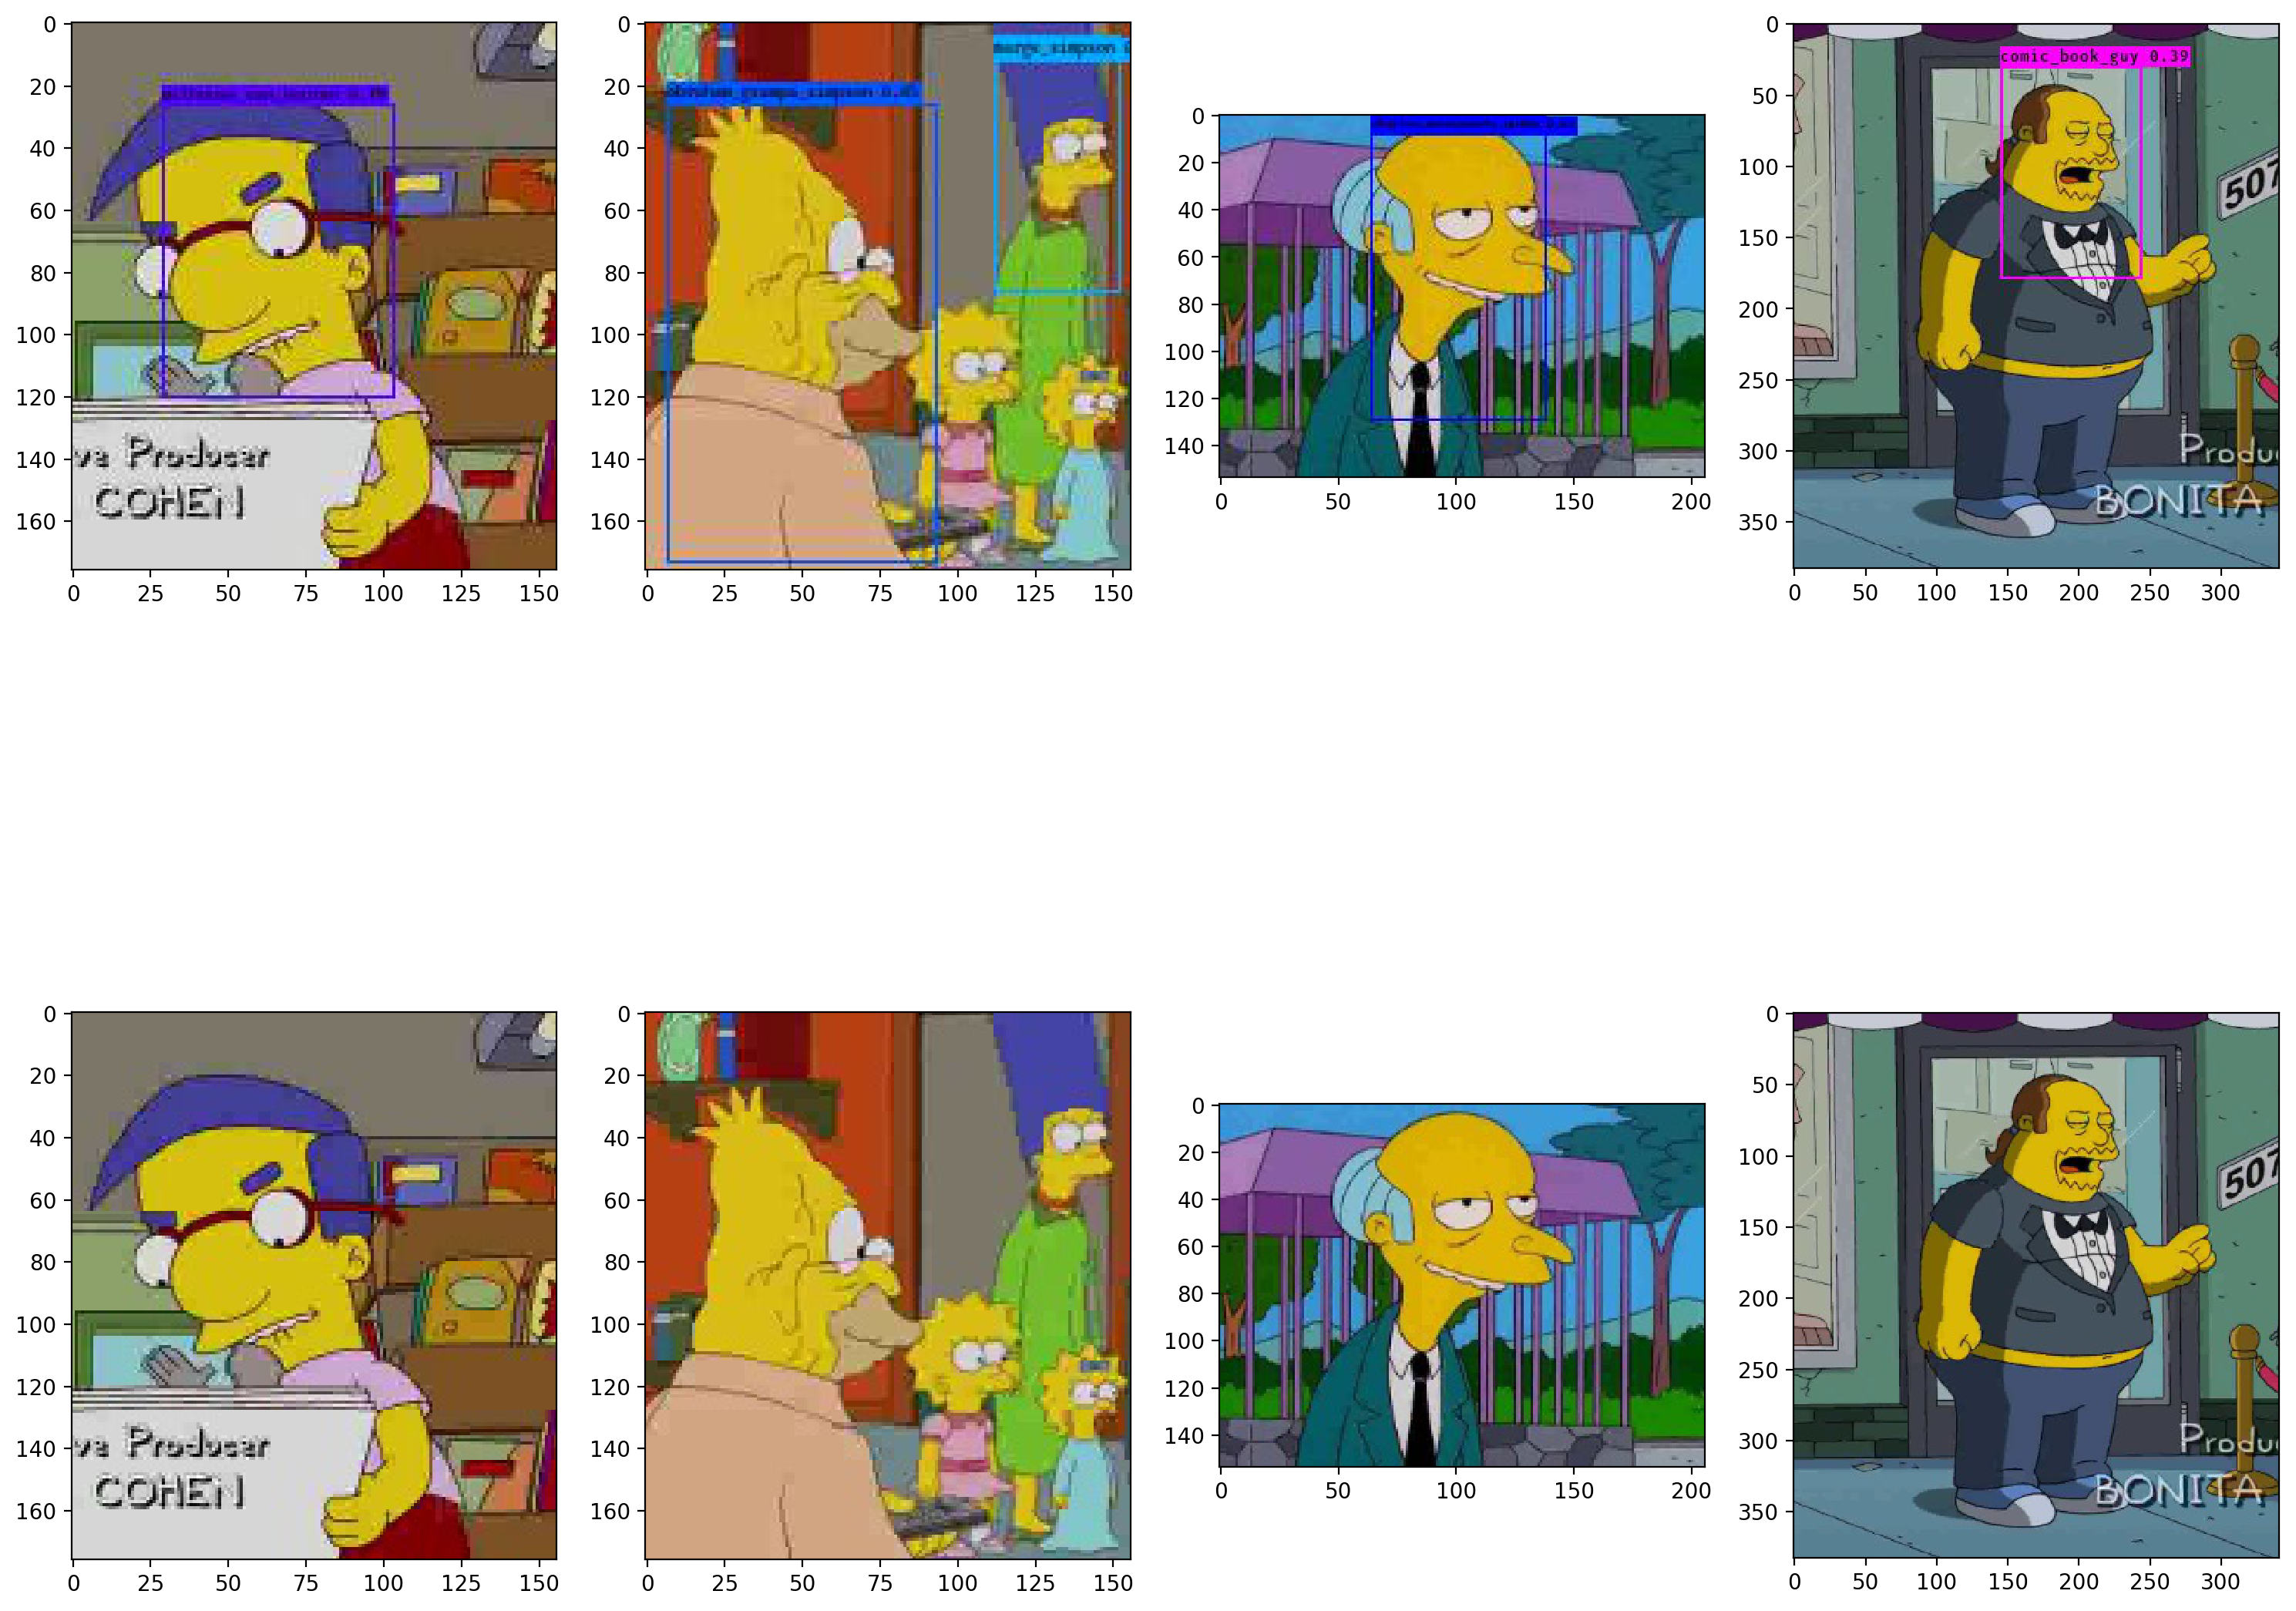

In [37]:
# 一応、いくつかのファイルで、バウンディングボックスは表示されていました。ただ、ラベルが当たっているかどうかは、
# 字が小さいため判別ができませんでした。
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

im1 = Image.open("AIF_sprint17_temp/test1.jpg")
im1_t = Image.open("AIF_sprint17_temp/milhouse_van_houten_38.jpg")

im2= Image.open("AIF_sprint17_temp/test2.jpg")
im2_t= Image.open("AIF_sprint17_temp/abraham_grampa_simpson_3.jpg")

im3 = Image.open("AIF_sprint17_temp/test3.jpg")
im3_t = Image.open("AIF_sprint17_temp/charles_montgomery_burns_13.jpg")

im4 = Image.open("AIF_sprint17_temp/test32.jpg")
im4_t = Image.open("AIF_sprint17_temp/comic_book_guy_39.jpg")


im_list1 = np.asarray(im1)
im_list1_t = np.asarray(im1_t)

im_list2 = np.asarray(im2)
im_list2_t = np.asarray(im2_t)

im_list3 = np.asarray(im3)
im_list3_t = np.asarray(im3_t)

im_list4 = np.asarray(im4)
im_list4_t = np.asarray(im4_t)

fig = plt.figure(figsize=(15,15),dpi=200)


fig.add_subplot(241)
plt.imshow(im_list1)
fig.add_subplot(245)
plt.imshow(im_list1_t)

fig.add_subplot(242)
plt.imshow(im_list2)
fig.add_subplot(246)
plt.imshow(im_list2_t)

fig.add_subplot(243)
plt.imshow(im_list3)
fig.add_subplot(247)
plt.imshow(im_list3_t)

fig.add_subplot(244)
plt.imshow(im_list4)
fig.add_subplot(248)
plt.imshow(im_list4_t)

fig.tight_layout()
plt.show()

### 論文と実装の対応を見る
説明  
まず、YOLOv3[1]において重要だと考えた部分を列挙する。そして、それに対応するコードを見つけていく。

**【回答】**  
・train.pyの以下箇所で「学習済みの重み」を事前に読み込んで、それに対していくつかの層だけの重みを更新していると認識しております。これはまさに転移学習だと思います。認識が間違っておりましたらご指摘ください。
>    else:  
>        model = create_model(input_shape, anchors, num_classes,  
>            freeze_body=2, weights_path='model_data/yolo_weights.h5') # make sure you know what you freeze

・また、model.pyのメソッドであるyolo_lossがyolov3のキモだと思います。
